In [1]:
%pip install -q git+https://github.com/rvanasa/pandas-gpt

from IPython.display import clear_output, display
clear_output()

In [1]:
import os
from IPython.display import clear_output
if not os.environ.get('OPENAI_API_KEY'):
  os.environ['OPENAI_API_KEY'] = input('Enter API key from (https://platform.openai.com/account/api-keys): ')
  clear_output()

In [2]:
import pandas as pd
import pandas_gpt

df = pd.read_csv('https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977


In [4]:
df = df.ask('remove PII')

In [5]:
df.ask('filter by products purchased in Laurenchester, NY', verbose=True)


```python
import pandas as pd

def process(df):
    # filter by Purchase Address containing 'Laurenchester, NY'
    df = df[df['Purchase Address'].str.contains('Laurenchester, NY')]
    
    # return filtered DataFrame
    return df
```


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177"
140484,276018,Google Phone,1.0,600.00,10/24/19 01:46,"78382 Noah Stream Suite 585, North Laurenchest..."


In [6]:
df.ask.code('add a new Category column with value "cheap", "regular", or "expensive"')

import pandas as pd

def process(df):
    # Create a new column called 'Category'
    df['Category'] = ''

    # Define the price ranges for each category
    cheap_range = (0, 20)
    regular_range = (20, 100)
    expensive_range = (100, float('inf'))

    # Loop through each row in the DataFrame
    for i, row in df.iterrows():
        # Get the price and quantity ordered for this row
        price = row['Price Each']
        quantity = row['Quantity Ordered']

        # Calculate the total cost of this row's order
        total_cost = price * quantity

        # Determine which category the total cost belongs to
        if total_cost >= expensive_range[0]:
            df.at[i, 'Category'] = 'expensive'
        elif total_cost >= regular_range[0]:
            df.at[i, 'Category'] = 'regular'
        else:
            df.at[i, 'Category'] = 'cheap'

    return df



In [7]:
df.ask('add a new Category column with value "cheap", "regular", or "expensive"')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Category
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",expensive
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",cheap
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",regular
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",expensive
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",cheap
...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529",cheap
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318",cheap
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ...",expensive
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6...",cheap


In [8]:
df.ask('show the outliers as a table', verbose=True)


```python
import pandas as pd
import numpy as np

def process(df):
    # create a new column called 'Total Sales' by multiplying Quantity Ordered and Price Each columns
    df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
    
    # calculate the Z-score of the Total Sales column
    df['Z-score'] = (df['Total Sales'] - df['Total Sales'].mean()) / df['Total Sales'].std(ddof=0)
    
    # identify the outliers by filtering the dataframe with Z-score greater than or equal to 3 or less than or equal to -3
    outliers = df[(df['Z-score'] >= 3) | (df['Z-score'] <= -3)]
    
    # select and reorder the columns that will be displayed in the table
    outliers = outliers[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Sales', 'Order Date', 'Purchase Address', 'Category']]
    
    return outliers
```


,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Category
11,141245,Macbook Pro Laptop,1.0,1700.0,1700.0,01/31/19 10:12,"1161 Thomas Track, North Kenneth, IL 62411",expensive
55,141288,Macbook Pro Laptop,1.0,1700.0,1700.0,01/19/19 08:17,"53609 Sherry Lake, East Stacy, KY 42286",expensive
82,141314,Macbook Pro Laptop,1.0,1700.0,1700.0,01/13/19 23:51,"2857 James Prairie, New Colleen, TX 78955",expensive
128,141360,Macbook Pro Laptop,1.0,1700.0,1700.0,01/17/19 21:00,"907 Darlene Mountain, Avilafort, CA 92698",expensive
155,141385,Macbook Pro Laptop,1.0,1700.0,1700.0,01/10/19 12:59,"10578 Sally Summit Suite 405, Christopherburgh...",expensive
...,...,...,...,...,...,...,...,...
185846,319570,Macbook Pro Laptop,1.0,1700.0,1700.0,12/09/19 17:40,"522 Russell River, New Sandra, MS 39485",expensive
185885,319607,Macbook Pro Laptop,1.0,1700.0,1700.0,12/25/19 20:07,"6065 Crane Mount, Lindseyhaven, FL 32311",expensive
185900,319622,Macbook Pro Laptop,1.0,1700.0,1700.0,12/15/19 07:11,"754 Brittany Pine Suite 974, West Jerry, FL 32030",expensive
185918,319639,Macbook Pro Laptop,1.0,1700.0,1700.0,12/20/19 10:56,"32708 Scott Street, West Logan, IL 61732",expensive


In [9]:
most_popular = df.ask('what are the top 10 most popular products, as a table')
most_popular

<string>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Total Ordered,Product
0,31017.0,AAA Batteries (4-pack)
1,27635.0,AA Batteries (4-pack)
2,23975.0,USB-C Charging Cable
3,23217.0,Lightning Charging Cable
4,20557.0,Wired Headphones
5,15661.0,Apple Airpods Headphones
6,13457.0,Bose SoundSport Headphones
7,7550.0,27in FHD Monitor
8,6849.0,iPhone
9,6244.0,27in 4K Gaming Monitor


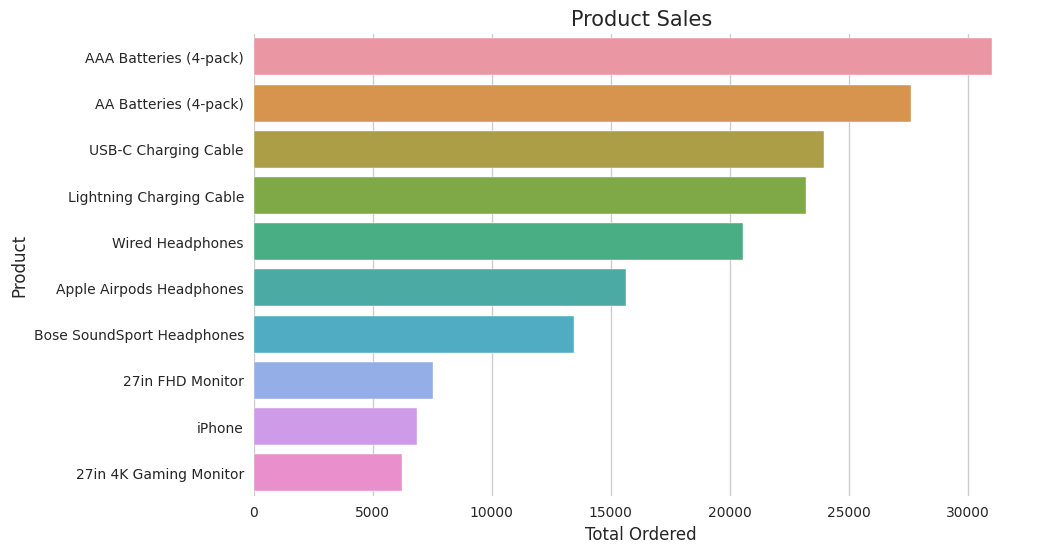

In [14]:
most_popular.ask('horizontal bar plot with nice style')